In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
training = pd.read_csv('train.csv', dtype= {'id':int,'store_nbr':int, 'unit_sales':float, 'onpromotion':str}, parse_dates=['date'])


In [5]:
items = pd.read_csv('items.csv')

In [6]:
stores=pd.read_csv('stores.csv')

In [7]:
test=pd.read_csv('test.csv',parse_dates=['date'])

In [8]:
transactions = pd.read_csv('transactions.csv',parse_dates=['date'])

In [9]:
holidays_events=pd.read_csv('holidays_events.csv',parse_dates=['date'])
sample_submission=pd.read_csv('sample_submission.csv')

In [10]:
print(items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.3+ KB
None


In [11]:
print(items.head())

   item_nbr        family  class  perishable
0     96995     GROCERY I   1093           0
1     99197     GROCERY I   1067           0
2    103501      CLEANING   3008           0
3    103520     GROCERY I   1028           0
4    103665  BREAD/BAKERY   2712           1


In [12]:
print(training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125497040 entries, 0 to 125497039
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   item_nbr     int64         
 4   unit_sales   float64       
 5   onpromotion  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 5.6+ GB
None


In [13]:
print(training.head())

   id       date  store_nbr  item_nbr  unit_sales onpromotion
0   0 2013-01-01         25    103665         7.0         NaN
1   1 2013-01-01         25    105574         1.0         NaN
2   2 2013-01-01         25    105575         2.0         NaN
3   3 2013-01-01         25    108079         1.0         NaN
4   4 2013-01-01         25    108701         1.0         NaN


In [14]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB
None


In [15]:
print(transactions.head())

        date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922


In [16]:
print(sample_submission.head())

          id  unit_sales
0  125497040           0
1  125497041           0
2  125497042           0
3  125497043           0
4  125497044           0


In [17]:
print(holidays_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB
None


In [24]:
items_with_other_inf = pd.merge(items,training,on='item_nbr',left_on=None, right_on=None, left_index=False, right_index=False,
                                sort=True,
                                 suffixes=("_item", "_training"))

In [25]:

items_with_other_info=pd.merge(items_with_other_inf,holidays_events, on ='date', left_on=None, right_on=None,
                              left_index=False, right_index=False, sort=True, suffixes=("_item","_holiday"))


Recap of data science problem
Corporación Favorita is a large Ecuadorian-based grocery retailer that operates hundreds of supermarkets and needs a forecasting model that will accurately predict the unit sales by product. Variables include store type, location, oil price, promotional information, holiday information and product type. The grocery store wants to ensure they can have just enough of the right products at the right time.The scope of the solution space remains within the 4000 products from 54 different store locations. Our model will not be predicting any unit sales outside of these products and store locations.The data provided has variables that include store number, item number, unit sales, and promotion information. The training data set covers 2013-2016 and the test set data is a 16-day window in 2017. There is store metadata available categorizing stores, listing location. There is also metadata for the products including family, class, and perishable. There is also data on holiday and events to show breaks in the work days. There is also daily oil price included for the time frame of the train and test data.  Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.


In [27]:

print(items_with_other_info.head())

   item_nbr        family  class  perishable  id       date  store_nbr  \
0    103665  BREAD/BAKERY   2712           1   0 2013-01-01         25   
1    105574     GROCERY I   1045           0   1 2013-01-01         25   
2    105575     GROCERY I   1045           0   2 2013-01-01         25   
3    108079     GROCERY I   1030           0   3 2013-01-01         25   
4    108701          DELI   2644           1   4 2013-01-01         25   

   unit_sales onpromotion     type    locale locale_name         description  \
0         7.0         NaN  Holiday  National     Ecuador  Primer dia del ano   
1         1.0         NaN  Holiday  National     Ecuador  Primer dia del ano   
2         2.0         NaN  Holiday  National     Ecuador  Primer dia del ano   
3         1.0         NaN  Holiday  National     Ecuador  Primer dia del ano   
4         1.0         NaN  Holiday  National     Ecuador  Primer dia del ano   

   transferred  
0        False  
1        False  
2        False  
3     

In [29]:

items_with_other_info.isnull().sum()

item_nbr             0
family               0
class                0
perishable           0
id                   0
date                 0
store_nbr            0
unit_sales           0
onpromotion    2481516
type                 0
locale               0
locale_name          0
description          0
transferred          0
dtype: int64

In [30]:
items_with_other_info.select_dtypes('object')

,family,onpromotion,type,locale,locale_name,description
0,BREAD/BAKERY,NaN,Holiday,National,Ecuador,Primer dia del ano
1,GROCERY I,NaN,Holiday,National,Ecuador,Primer dia del ano
2,GROCERY I,NaN,Holiday,National,Ecuador,Primer dia del ano
3,GROCERY I,NaN,Holiday,National,Ecuador,Primer dia del ano
4,DELI,NaN,Holiday,National,Ecuador,Primer dia del ano
...,...,...,...,...,...,...
21828203,BEVERAGES,False,Holiday,Local,Riobamba,Fundacion de Riobamba
21828204,BEVERAGES,False,Holiday,Local,Riobamba,Fundacion de Riobamba
21828205,BEVERAGES,False,Holiday,Local,Riobamba,Fundacion de Riobamba
21828206,BEVERAGES,False,Holiday,Local,Riobamba,Fundacion de Riobamba


In [22]:
items_with_other_info.item_nbr.nunique()

4033

In [23]:
items_with_other_info['family'].value_counts()

GROCERY I                     7854878
BEVERAGES                     3110111
CLEANING                      2889939
DAIRY                         1564580
PRODUCE                       1323594
PERSONAL CARE                  797374
BREAD/BAKERY                   789980
DELI                           696006
HOME CARE                      534422
MEATS                          407778
POULTRY                        303690
FROZEN FOODS                   272110
EGGS                           266817
LIQUOR,WINE,BEER               188288
PREPARED FOODS                 129876
HOME AND KITCHEN I             105216
HOME AND KITCHEN II             86626
CELEBRATION                     67401
AUTOMOTIVE                      57270
LADIESWEAR                      52924
LINGERIE                        48844
GROCERY II                      48378
PLAYERS AND ELECTRONICS         46504
SEAFOOD                         43353
BEAUTY                          32069
PET SUPPLIES                    30112
LAWN AND GAR

In [34]:
(items_with_other_info['item_nbr'].astype('str')+', '+ items_with_other_info['family']+', '+items_with_other_info['description']).value_counts()

564533, GROCERY I, Carnaval                   496
364606, GROCERY I, Carnaval                   495
502331, BREAD/BAKERY, Carnaval                494
314384, GROCERY I, Carnaval                   493
273528, PERSONAL CARE, Carnaval               490
                                             ... 
1344755, GROCERY I, Terremoto Manabi+25         1
1935459, PERSONAL CARE, Terremoto Manabi+3      1
1935465, BEAUTY, Terremoto Manabi+3             1
1946668, GROCERY I, Terremoto Manabi+3          1
1441468, GROCERY I, Terremoto Manabi+9          1
Length: 351627, dtype: int64

In [22]:
items_with_other_info['family'].value_counts()

GROCERY I                     7854878
BEVERAGES                     3110111
CLEANING                      2889939
DAIRY                         1564580
PRODUCE                       1323594
PERSONAL CARE                  797374
BREAD/BAKERY                   789980
DELI                           696006
HOME CARE                      534422
MEATS                          407778
POULTRY                        303690
FROZEN FOODS                   272110
EGGS                           266817
LIQUOR,WINE,BEER               188288
PREPARED FOODS                 129876
HOME AND KITCHEN I             105216
HOME AND KITCHEN II             86626
CELEBRATION                     67401
AUTOMOTIVE                      57270
LADIESWEAR                      52924
LINGERIE                        48844
GROCERY II                      48378
PLAYERS AND ELECTRONICS         46504
SEAFOOD                         43353
BEAUTY                          32069
PET SUPPLIES                    30112
LAWN AND GAR

In [23]:
(items_with_other_info['family'] + ', ' + items_with_other_info['description']).value_counts(ascending=False)

GROCERY I, Carnaval                      257310
GROCERY I, Fundacion de Cuenca           170447
GROCERY I, Dia de la Madre-1             145603
GROCERY I, Dia del Trabajo               144973
GROCERY I, Fundacion de Santo Domingo    144589
                                          ...  
BOOKS, Cantonizacion de El Carmen             1
BOOKS, Fundacion de Santo Domingo             1
BOOKS, Cantonizacion de Cayambe               1
BOOKS, Fundacion de Guayaquil-1               1
BOOKS, Fundacion de Guayaquil                 1
Length: 3191, dtype: int64

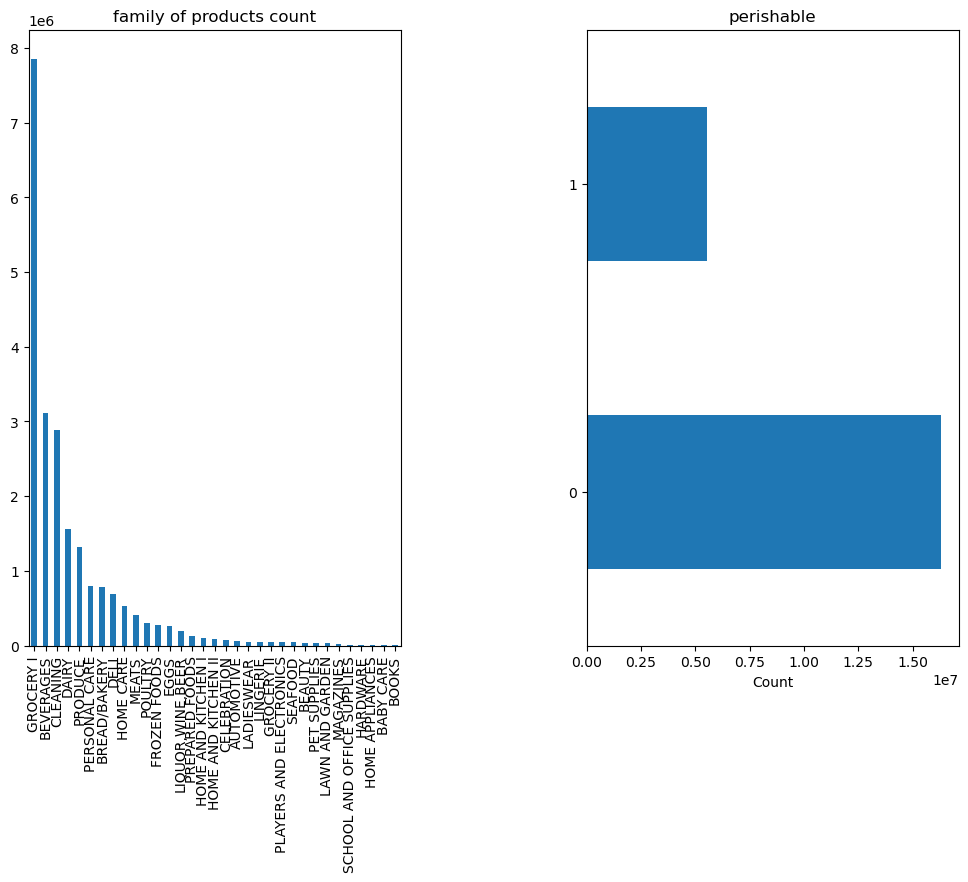

In [52]:

#Code task 13#
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
items_with_other_info.family.value_counts().plot(kind='bar', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('family of products count')
#Label the xaxis 'Count'
#Give the plot a helpful title of 'state'
items_with_other_info.perishable.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('perishable')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);
#You're encouraged to explore a few

In [36]:
items_with_other_info.rename(columns={'onpromotion':'on_sale'},inplace=True)

Text(0.5, 1.0, 'perishable')

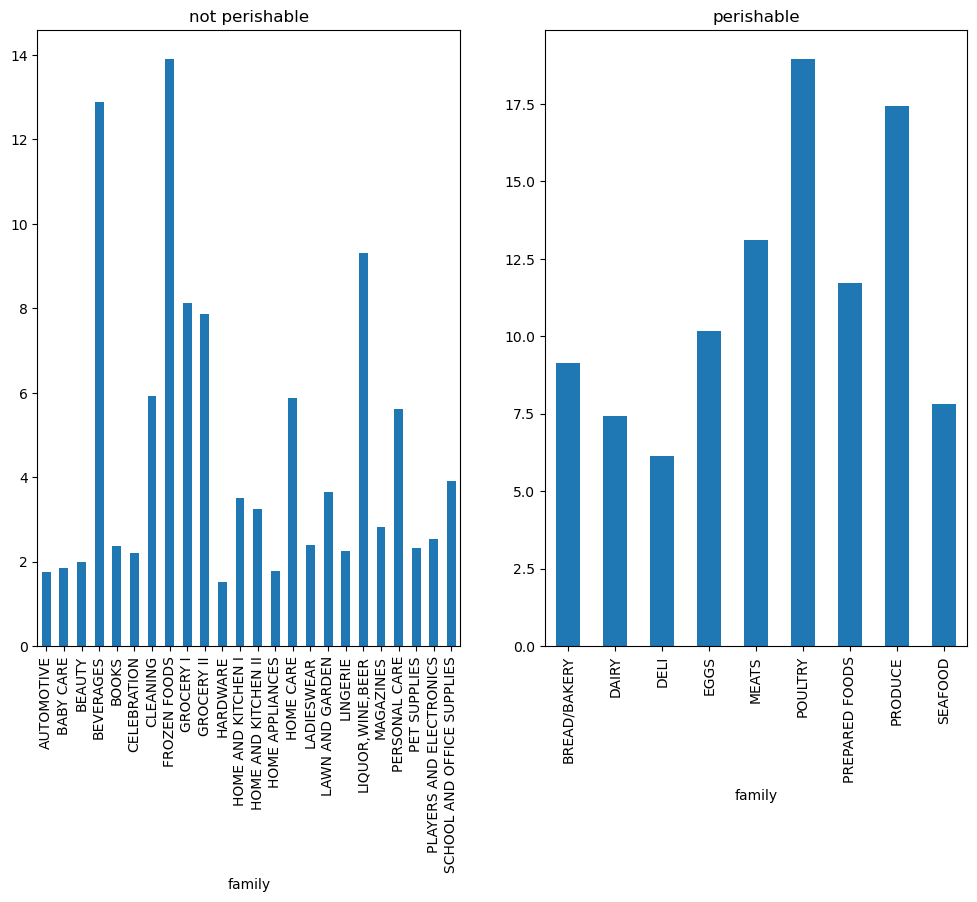

In [99]:
df=items_with_other_info.groupby('family')['unit_sales'].mean()
df_not_perishable_grouped=items_with_other_info[items_with_other_info['perishable']==0].groupby('family')['unit_sales'].mean()
df_perishable_grouped=items_with_other_info[items_with_other_info['perishable']==1].groupby('family')['unit_sales'].mean()

#Code task 13#
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig,ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df_not_perishable_grouped.plot(kind='bar',ax=ax[0])
df_perishable_grouped.plot(kind='bar',ax=ax[1])
#Give the plot a helpful title of 'Region'
ax[0].set_title('not perishable')
ax[1].set_title('perishable')


              
              # importing pandas library 

<Axes: xlabel='family'>

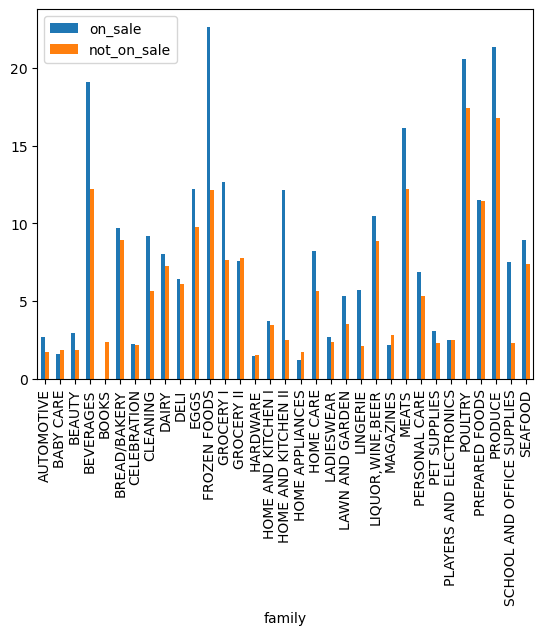

In [103]:
df_not_on_sale_grouped=items_with_other_info[items_with_other_info['on_sale']=='False'].groupby('family')['unit_sales'].mean()
df_on_sale_ungrouped=items_with_other_info[items_with_other_info['on_sale']=='True']
df_on_sale_grouped = df_on_sale_ungrouped.groupby('family')['unit_sales'].mean()
# plotting graph 
new_df = pd.DataFrame({'on_sale':df_on_sale_grouped, 'not_on_sale':df_not_on_sale_grouped}).reset_index()
new_df.plot(x='family',y=["on_sale", "not_on_sale"], kind="bar") 

<Axes: xlabel='family'>

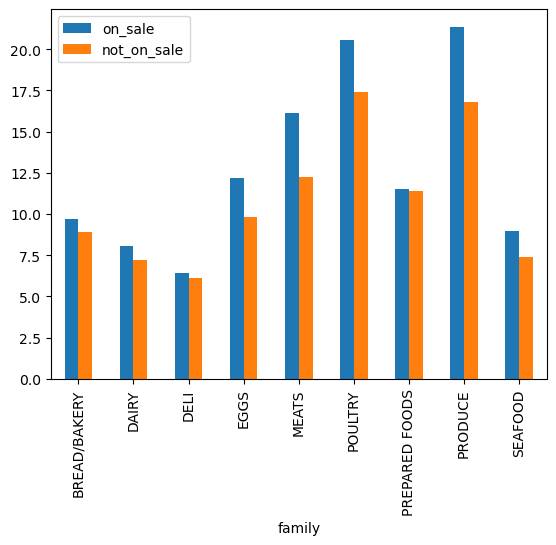

In [105]:
df_perishable_on_sale_grouped=items_with_other_info[(items_with_other_info['on_sale']=='True')&(items_with_other_info['perishable']==1)].groupby('family')['unit_sales'].mean()
df_perishable_not_on_sale_grouped=items_with_other_info[(items_with_other_info['on_sale']=='False')&(items_with_other_info['perishable']==1)].groupby('family')['unit_sales'].mean()
#Code task 13#
perish_df = pd.DataFrame({'on_sale':df_perishable_on_sale_grouped, 'not_on_sale':df_perishable_not_on_sale_grouped}).reset_index()
perish_df.plot(x='family',y=["on_sale", "not_on_sale"], kind="bar")

<Axes: xlabel='family'>

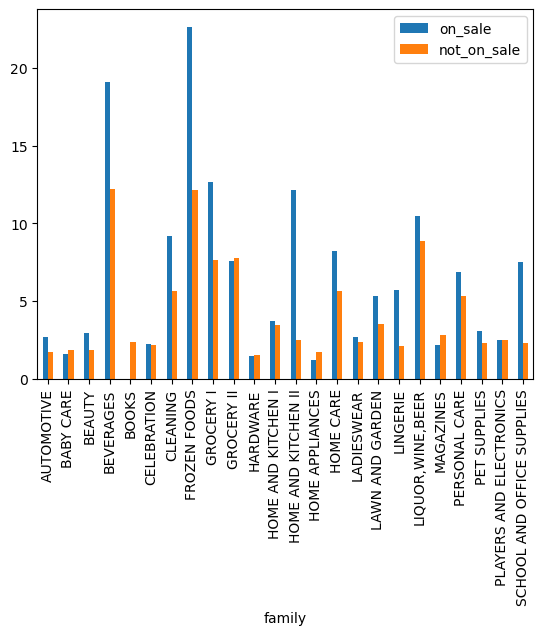

In [106]:

df_notperishable_on_sale_grouped=items_with_other_info[(items_with_other_info['on_sale']=='True')&(items_with_other_info['perishable']==0)].groupby('family')['unit_sales'].mean()
df_notperishable_not_on_sale_grouped=items_with_other_info[(items_with_other_info['on_sale']=='False')&(items_with_other_info['perishable']==0)].groupby('family')['unit_sales'].mean()
#Code task 13#
notperish_df = pd.DataFrame({'on_sale':df_notperishable_on_sale_grouped, 'not_on_sale':df_notperishable_not_on_sale_grouped}).reset_index()
notperish_df.plot(x='family',y=["on_sale", "not_on_sale"], kind="bar")